In [49]:
import os
import os.path as osp
import mmcv
import numpy as np
import matplotlib.pyplot as plt
import sys
import PIL
os.chdir('/home/damon/Github/mmlab/mmdetection/')
%load_ext autoreload
%autoreload 2
sys.path.append('/home/damon/detorch/')
from visdrone.utils import result_utils, MergeTxt
from visualization_utils import *
from debug_utils import *

swap = lambda b: np.stack([b[:, 1], b[:, 0], b[:, 3], b[:, 2]], 1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
from numpy import random
colors = list(PIL.ImageColor.colormap.keys())
seq_dir = '/home/damon/DATASETS/Drone2019/VisDrone2019-VID/VisDrone2018-VID-test-challenge/sequences/'
res_dir = '/tmp/test896_A2enhance/'
res_dir = '/tmp/test896_A2patch1500E1'
res_dir = '/tmp/testori_gavid1500seq' # DET
res_dir = '/tmp/testori_A2Ehvid133E10seq'

res_dir = '/tmp/vidout/'

In [104]:
det_dict = result_utils.single_seq2res(res_dir)

(485, 5)


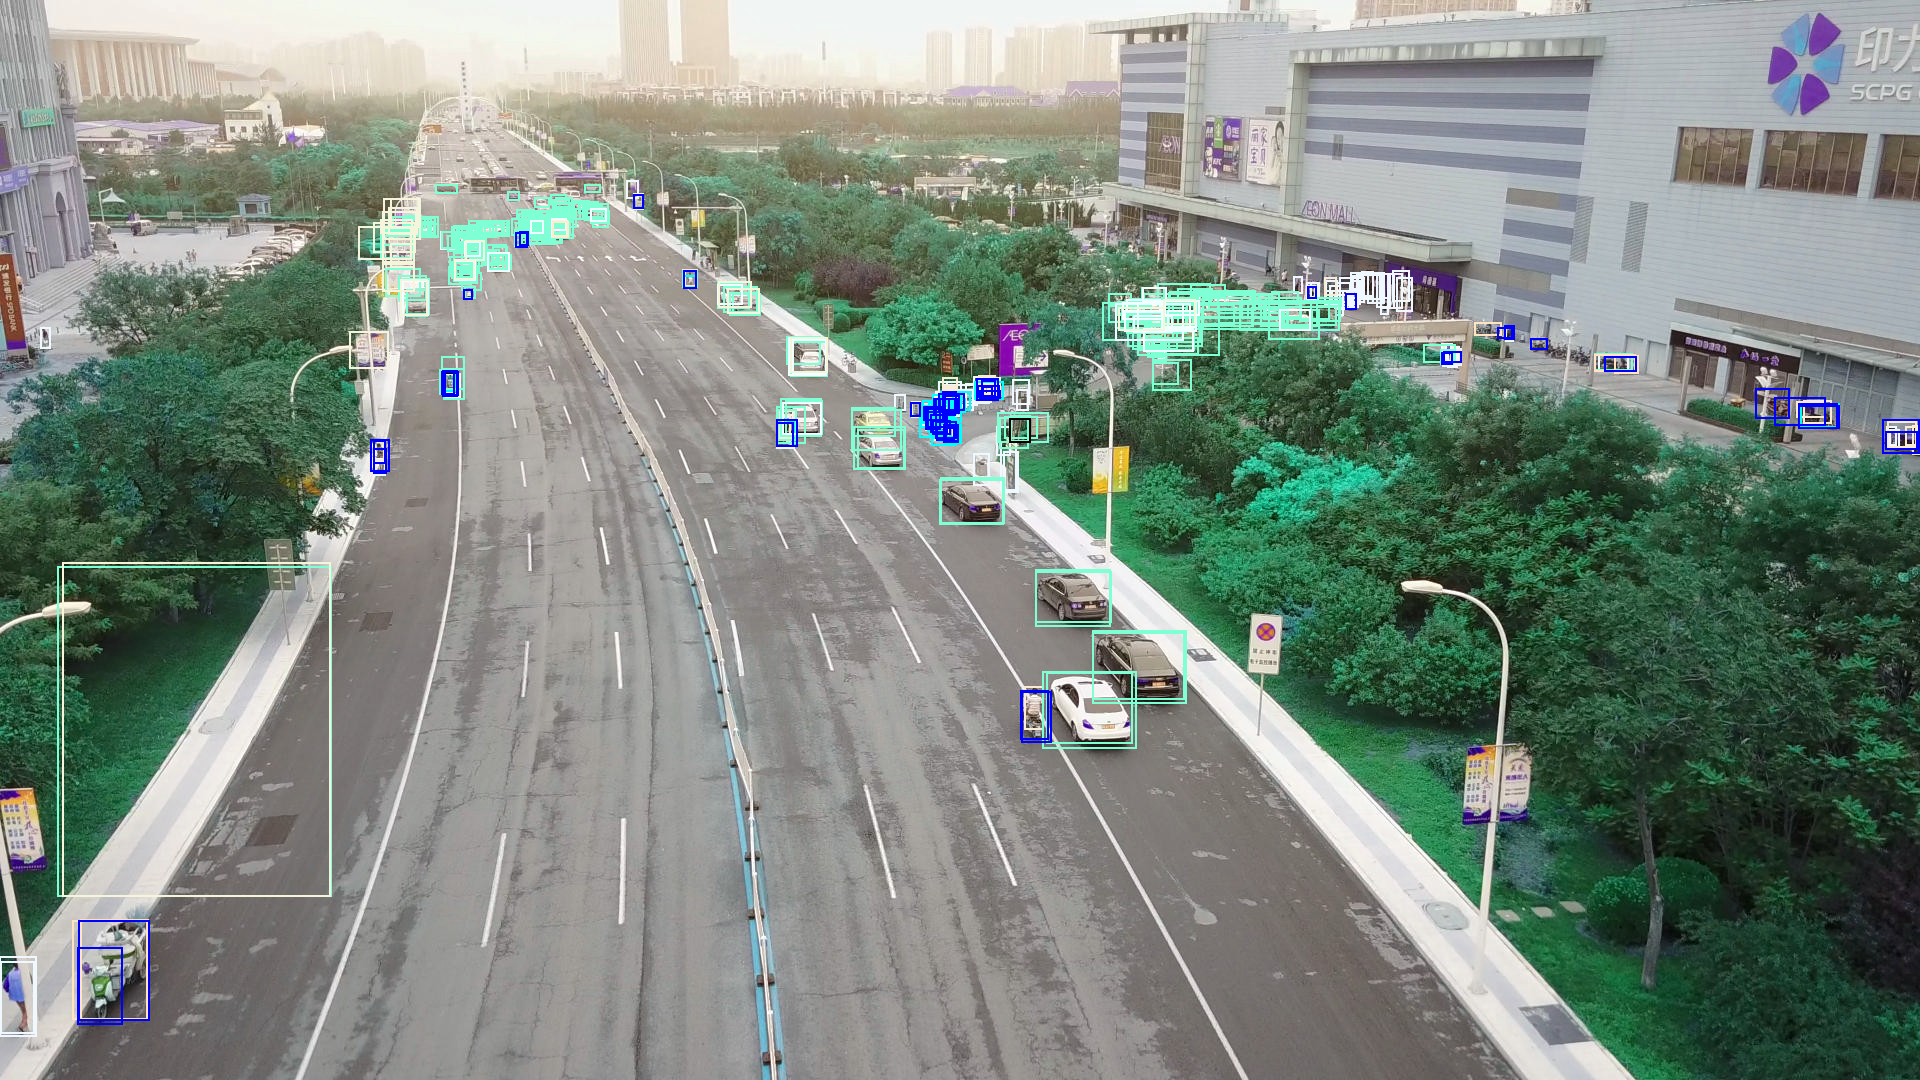

In [139]:
# select which sequence
seq_list = os.listdir(seq_dir)
seq = random.choice(seq_list)
# seq = 'uav0000369_00001_v'
seq = 'uav0000233_01200_v'
res = seq + '.txt'
# select which frame
frame = 230
frame = format(frame, '07d')
img = osp.join(seq_dir, seq, frame + '.jpg')
img = mmcv.imread(img)
# read img result
key = '_'.join([seq, frame])
det = det_dict[key]

disp_thr = 0.00

ret = np.copy(img)
for i, bb in enumerate(det):
    bb = bb[bb[:, -1] > disp_thr]
    ret = draw_bounding_boxes_on_image_array(ret, swap(bb), color=colors[i], thickness=2)
print(np.concatenate(det, 0).shape)
visualize_image_array(ret)

In [137]:
seq

'uav0000233_01200_v'

In [109]:
seq

'uav0000074_10080_v'